In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
pwd

'/Users/jess/PersonalClassFile/project1/room9-project'

In [3]:
filepath = "data/VA_OutcomesMeasures_October2016_CMS_Submission.xlsx"

In [4]:
import pandas as pd

main_psi_df = pd.read_excel(filepath, sheet_name="PSI")
main_dr_df = pd.read_excel(filepath, sheet_name="Death Rates")
main_rr_df = pd.read_excel(filepath, sheet_name="Readmission Rate")

In [5]:
#Create working data frame for death rate from main data frame 
working_dr_df = main_dr_df[(main_dr_df["State"]== 'VA') |    (main_dr_df["State"]== 'GA')]
working_dr_df.head()


,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA\n National Rate,Number of\n Observations,Number of\n Deaths,Footnotes,Date Range
78,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),8.89,6.48,11.9,9.21,116,7,NaN,October 2013 – September 2015
79,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),5.59,4.27,7.28,7.72,621,24,NaN,October 2013 – September 2015
80,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Pneumonia (PN),7.31,5.59,9.5,8.64,280,15,NaN,October 2013 – September 2015
81,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),10.27,7.53,14.16,9.21,63,8,NaN,October 2013 – September 2015
82,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),8.08,6.12,10.86,7.72,263,19,NaN,October 2013 – September 2015


In [6]:
#Account for missing data with replace and drop functions

working_dr_df['Rate'] = working_dr_df['Rate'].replace ({"*": np.nan})
working_dr_df['95% Confidence Lower Limit'] = working_dr_df['95% Confidence Lower Limit'].replace ({"*": np.nan})
working_dr_df['95% Confidence Upper Limit'] = working_dr_df['95% Confidence Upper Limit'].replace ({"*": np.nan})
del working_dr_df ["Footnotes"]
working_dr_df = working_dr_df.dropna()
working_dr_df.head()

<ipython-input-6-53d655a57caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_dr_df['Rate'] = working_dr_df['Rate'].replace ({"*": np.nan})
<ipython-input-6-53d655a57caf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_dr_df['95% Confidence Lower Limit'] = working_dr_df['95% Confidence Lower Limit'].replace ({"*": np.nan})
<ipython-input-6-53d655a57caf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA\n National Rate,Number of\n Observations,Number of\n Deaths,Date Range
78,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),8.89,6.48,11.90,9.21,116,7,October 2013 – September 2015
79,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),5.59,4.27,7.28,7.72,621,24,October 2013 – September 2015
80,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Death Rates,Pneumonia (PN),7.31,5.59,9.50,8.64,280,15,October 2013 – September 2015
81,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Acute Myocardial Infarction (AMI),10.27,7.53,14.16,9.21,63,8,October 2013 – September 2015
82,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Death Rates,Congestive Heart Failure (CHF),8.08,6.12,10.86,7.72,263,19,October 2013 – September 2015


In [7]:
#Count the number of unique values for each VHA Hospital Facility

In [8]:
vha_dr_locations = working_dr_df["VHA Facility"].value_counts()
vha_dr_locations


SALEM VA MEDICAL CENTER                3
AUGUSTA VA MEDICAL CENTER              3
DECATUR (ATLANTA) VA MEDICAL CENTER    3
RICHMOND VA MEDICAL CENTER             3
DUBLIN VA MEDICAL CENTER               2
HAMPTON VA MEDICAL CENTER              2
Name: VHA Facility, dtype: int64

In [9]:
#Create a New Data Frame with just the Hospital Facility, State, and Death Rate


In [10]:
new_dr = working_dr_df[['VHA Facility', 'State', 'Rate']]

new_dr


,VHA Facility,State,Rate
78,DECATUR (ATLANTA) VA MEDICAL CENTER,GA,8.89
79,DECATUR (ATLANTA) VA MEDICAL CENTER,GA,5.59
80,DECATUR (ATLANTA) VA MEDICAL CENTER,GA,7.31
81,AUGUSTA VA MEDICAL CENTER,GA,10.27
82,AUGUSTA VA MEDICAL CENTER,GA,8.08
83,AUGUSTA VA MEDICAL CENTER,GA,7.68
85,DUBLIN VA MEDICAL CENTER,GA,6.74
86,DUBLIN VA MEDICAL CENTER,GA,9.36
343,HAMPTON VA MEDICAL CENTER,VA,7.63
344,HAMPTON VA MEDICAL CENTER,VA,8.94


In [11]:
#Calculate the Average Death Rate Per Facility

avg_dr_per_facility = new_dr.groupby('VHA Facility')['Rate'].sum() / vha_dr_locations

avg_dr_summary = {"AVG Death Rate": avg_dr_per_facility}
avg_dr_summary_df = pd.DataFrame(avg_dr_summary)
avg_dr_summary_df

#Create array and add as new column in data frame

hospital_name = np.array(['Augusta VH','Decatur VH', 'Dublin VH', 'Hampton VH', 'Richmond VH', 'Salem VH'])
avg_dr_summary_df['Hospital Facility'] = hospital_name.tolist()

avg_dr_summary_df.round(2)


,AVG Death Rate,Hospital Facility
AUGUSTA VA MEDICAL CENTER,8.68,Augusta VH
DECATUR (ATLANTA) VA MEDICAL CENTER,7.26,Decatur VH
DUBLIN VA MEDICAL CENTER,8.05,Dublin VH
HAMPTON VA MEDICAL CENTER,8.28,Hampton VH
RICHMOND VA MEDICAL CENTER,8.79,Richmond VH
SALEM VA MEDICAL CENTER,8.66,Salem VH


In [12]:
#Count the Number of unique values for each State

vha_dr_states = working_dr_df["State"].value_counts()
vha_dr_states

GA    8
VA    8
Name: State, dtype: int64

In [13]:
#Calculate the Average Death Rate for VA Hospitals in each State

avg_dr_per_state = new_dr.groupby('State')['Rate'].sum() / vha_dr_states

avg_dr_state_summary = {"AVG Death Rate": avg_dr_per_state}
avg_dr_state_summary_df = pd.DataFrame(avg_dr_state_summary)
avg_dr_state_summary_df

#Create array and add as new column in data frame
state_name = np.array(['Georgia','Virginia'])
avg_dr_state_summary_df['State'] = state_name.tolist()

avg_dr_state_summary_df.round(2)



,AVG Death Rate,State
State,,
GA,7.99,Georgia
VA,8.62,Virginia


In [14]:
#Create working data frame for readmission rates from the main data frame

working_rr_df = main_rr_df[(main_rr_df["State"]== 'VA') |    (main_rr_df["State"]== 'GA')]
working_rr_df.head()



,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA\n National Rate,Number of\n Observations,Number of\n Readmissions,Footnotes,Date Range
78,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Readmission Rates,Acute Myocardial Infarction (AMI),14.79,12.27,17.83,15.57,102,10,NaN,October 2013 – September 2015
79,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Readmission Rates,Congestive Heart Failure (CHF),19.19,16.87,21.62,19.34,736,138,NaN,October 2013 – September 2015
80,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Readmission Rates,Pneumonia (PN),15.02,12.58,17.91,14.74,276,41,NaN,October 2013 – September 2015
81,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Readmission Rates,Acute Myocardial Infarction (AMI),15.73,12.84,19.02,15.57,54,9,NaN,October 2013 – September 2015
82,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Readmission Rates,Congestive Heart Failure (CHF),19.69,16.75,23.02,19.34,298,59,NaN,October 2013 – September 2015


In [15]:
#Account for missing data with replace and drop functions

In [16]:
working_rr_df['Rate'] = working_rr_df['Rate'].replace ({"*": np.nan})
working_rr_df['95% Confidence Lower Limit'] = working_rr_df['95% Confidence Lower Limit'].replace ({"*": np.nan})
working_rr_df['95% Confidence Upper Limit'] = working_rr_df['95% Confidence Upper Limit'].replace ({"*": np.nan})
del working_rr_df ["Footnotes"]
working_rr_df = working_rr_df.dropna()
working_rr_df.head()

<ipython-input-16-b84f92078066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_rr_df['Rate'] = working_rr_df['Rate'].replace ({"*": np.nan})
<ipython-input-16-b84f92078066>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_rr_df['95% Confidence Lower Limit'] = working_rr_df['95% Confidence Lower Limit'].replace ({"*": np.nan})
<ipython-input-16-b84f92078066>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Disease Cohort,Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,VHA\n National Rate,Number of\n Observations,Number of\n Readmissions,Date Range
78,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Readmission Rates,Acute Myocardial Infarction (AMI),14.79,12.27,17.83,15.57,102,10,October 2013 – September 2015
79,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Readmission Rates,Congestive Heart Failure (CHF),19.19,16.87,21.62,19.34,736,138,October 2013 – September 2015
80,11029F,DECATUR (ATLANTA) VA MEDICAL CENTER,1670 CLAIRMONT ROAD,DECATUR,GA,30033.0,VA 30-day Readmission Rates,Pneumonia (PN),15.02,12.58,17.91,14.74,276,41,October 2013 – September 2015
81,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Readmission Rates,Acute Myocardial Infarction (AMI),15.73,12.84,19.02,15.57,54,9,October 2013 – September 2015
82,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,VA 30-day Readmission Rates,Congestive Heart Failure (CHF),19.69,16.75,23.02,19.34,298,59,October 2013 – September 2015


In [17]:
#Count the number of unique values for each VHA Hospital Facility

vha_rr_locations = working_rr_df["VHA Facility"].value_counts()
vha_rr_locations

SALEM VA MEDICAL CENTER                3
AUGUSTA VA MEDICAL CENTER              3
DECATUR (ATLANTA) VA MEDICAL CENTER    3
RICHMOND VA MEDICAL CENTER             3
DUBLIN VA MEDICAL CENTER               2
HAMPTON VA MEDICAL CENTER              2
Name: VHA Facility, dtype: int64

In [18]:
#Create new data frame for readmission rates by VHA Facility, State, and Rate

new_rr = working_rr_df[['VHA Facility', 'State', 'Rate']]

new_rr

,VHA Facility,State,Rate
78,DECATUR (ATLANTA) VA MEDICAL CENTER,GA,14.79
79,DECATUR (ATLANTA) VA MEDICAL CENTER,GA,19.19
80,DECATUR (ATLANTA) VA MEDICAL CENTER,GA,15.02
81,AUGUSTA VA MEDICAL CENTER,GA,15.73
82,AUGUSTA VA MEDICAL CENTER,GA,19.69
83,AUGUSTA VA MEDICAL CENTER,GA,14.42
85,DUBLIN VA MEDICAL CENTER,GA,18.91
86,DUBLIN VA MEDICAL CENTER,GA,14.77
343,HAMPTON VA MEDICAL CENTER,VA,17.89
344,HAMPTON VA MEDICAL CENTER,VA,14.40


In [19]:
#Calculate the Average Readmission rate per facility

vha_rr_facility = new_rr["VHA Facility"].unique()

avg_rr_per_facility = new_rr.groupby('VHA Facility')['Rate'].sum() / vha_rr_locations

avg_rr_summary = {"AVG Readmission Rate": avg_rr_per_facility}
avg_rr_summary_df = pd.DataFrame(avg_rr_summary)
avg_rr_summary_df

#Create array and add as new column in data frame

hospital_name = np.array(['Augusta VH','Decatur VH', 'Dublin VH', 'Hampton VH', 'Richmond VH', 'Salem VH'])
avg_rr_summary_df['Hospital Facility'] = hospital_name.tolist()

avg_rr_summary_df.round(2)

,AVG Readmission Rate,Hospital Facility
AUGUSTA VA MEDICAL CENTER,16.61,Augusta VH
DECATUR (ATLANTA) VA MEDICAL CENTER,16.33,Decatur VH
DUBLIN VA MEDICAL CENTER,16.84,Dublin VH
HAMPTON VA MEDICAL CENTER,16.14,Hampton VH
RICHMOND VA MEDICAL CENTER,17.66,Richmond VH
SALEM VA MEDICAL CENTER,15.78,Salem VH


In [20]:




#Count the number of unique values per state

vha_rr_states = working_rr_df["State"].value_counts()
vha_rr_states

GA    8
VA    8
Name: State, dtype: int64

In [21]:
#Calculate the average Readmission Rate per state

avg_rr_per_state = new_rr.groupby('State')['Rate'].sum() / vha_rr_states


avg_rr_state_summary = {"AVG Readmission Rate": avg_rr_per_state}
avg_rr_state_summary_df = pd.DataFrame(avg_rr_state_summary)
avg_rr_state_summary_df

#Create array and add as new column in data frame
state_name = np.array(['Georgia','Virginia'])
avg_rr_state_summary_df['State'] = state_name.tolist()

avg_rr_state_summary_df.round(2)


,AVG Readmission Rate,State
State,,
GA,16.57,Georgia
VA,16.58,Virginia


In [22]:
#Plot findings into graph

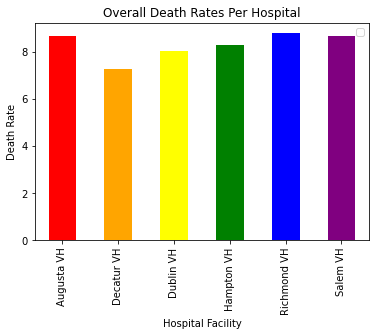

In [23]:
#Overall Death Rate


avg_dr_summary_df.plot.bar(x= 'Hospital Facility', y= 'AVG Death Rate', color = ['red', 'orange', 'yellow', 'green',
                                                                                'blue', 'purple'])
plt.ylabel("Death Rate")
plt.title("Overall Death Rates Per Hospital")
plt.legend('')

plt.savefig('Death_Rate.png')


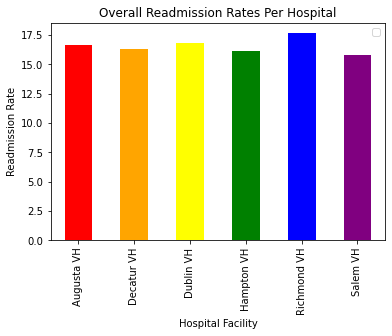

In [24]:
#Plot Overall Readmisison Rates

avg_rr_summary_df.plot.bar(x= 'Hospital Facility', y= 'AVG Readmission Rate', color = ['red', 'orange', 'yellow', 'green',
                                                                                'blue', 'purple'])
plt.ylabel("Readmission Rate")
plt.title("Overall Readmission Rates Per Hospital")
plt.legend('')

plt.savefig('Readmission_Rate.png')


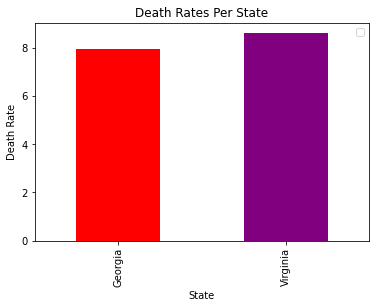

In [25]:
#Plot Death Rates Per State

avg_dr_state_summary_df.plot.bar(x= 'State', y= 'AVG Death Rate', color = ['red','purple'])

plt.ylabel("Death Rate")
plt.title("Death Rates Per State")
plt.legend('')

plt.savefig('State_Death_Rates.png')

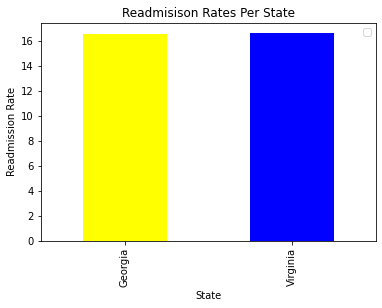

In [26]:
#Plot Death Rates Per State

avg_rr_state_summary_df.plot.bar(x= 'State', y= 'AVG Readmission Rate', color = ['yellow','blue'])

plt.ylabel("Readmission Rate")
plt.title("Readmisison Rates Per State")
plt.legend('')

plt.savefig('State_Readmission_Rates.png')